# Week 8 : Lab 
 ## Data structures: Numerical arrays
 ##### CS1P - University of Glasgow - John Williamson - 2016

In [2]:
## RUN ME FIRST!
from __future__ import division   # make division work like Python 3.x
from image_audio import * 
import numpy as np
%matplotlib inline


## Lab exercise
**You must make a reasonble attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab
This lab will familiarise you with using numerical arrays in Python using Numpy. This includes:
* creating arrays
* multi-dimensional slicing
* joining arrays
* array arithmetic and broadcasting
* vectorised operations
* images as arrays



## Before the lab
* Complete at least the A exercises.




## During the lab session

* Complete the B exercise. 


## A: Quick problems

### A.1 Box matrix

Write a function `box_matrix(rows, cols)` which creates a new matrix with the given number of rows and columns, such that all elements are 0, except for the rows and columns at the edges of the matrix, which should be 1, (a "hollow" or "box" matrix").

**DO NOT USE ANY FORM OF LOOP**

So 

    box_matrix(2,2) =
        array([[ 1.,  1.],
               [ 1.,  1.]])
        
    box_matrix(4,4) =
        array([[ 1.,  1.,  1.,  1.],
               [ 1.,  0.,  0.,  1.],
               [ 1.,  0.,  0.,  1.],
               [ 1.,  1.,  1.,  1.]])
        
    box_matrix(3,6) =
        array([[ 1.,  1.,  1.,  1.,  1.,  1.],
               [ 1.,  0.,  0.,  0.,  0.,  1.],
               [ 1.,  1.,  1.,  1.,  1.,  1.]])
        

In [9]:
# Solution goes here
def box_matrix(rows,cols):
    array = np.zeros((rows,cols))
    array[0,:] = 1
    array[:,0] = 1
    array[(rows-1),:] = 1
    array[:,(cols-1)] = 1
    return array

print box_matrix(2,2)
print
print box_matrix(4,4)
print
print box_matrix(3,6)

    
    

[[ 1.  1.]
 [ 1.  1.]]

[[ 1.  1.  1.  1.]
 [ 1.  0.  0.  1.]
 [ 1.  0.  0.  1.]
 [ 1.  1.  1.  1.]]

[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


### A.2 Unscramble
There are some image loading and drawing functions provided for you:

(297L, 400L) float64


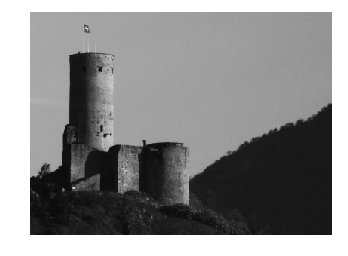

In [10]:
# shows how image works
castle = load_image_gray("imgs/castle.png")
print castle.shape, castle.dtype

# show_image should get a 2D array (or a 3D array for colour images)
show_image(castle)

You have decoded a space transmission from a [slow-scan television] (https://en.wikipedia.org/wiki/Slow-scan_television) radio broadcast. All you have is a series of measurements over time, one pixel after the other -- a **1D array. ** You need to convert this to a 2D array to show it as an image.

You know the following:

* The image should be 260 lines high. 

* The pixel values recorded from the receiver range from 0-800. You need to scale them to the 0-1 range to be able to show them.

Using these two bits of information, recover the original image and show it with `show_image()`.

`sstv` contains the radio broadcast as a 1D array.

In [39]:
## The data from the slow scan television
sstv = np.load("sstv.npz")['signal']
print sstv.shape, sstv.dtype

(44980L,) float64


(44980L,) float64
773.877342784

(260L, 173L) float64
0.96734667848


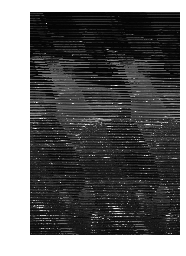

In [45]:
# Solution goes here
sstv = np.load("sstv.npz")['signal']
print sstv.shape, sstv.dtype
print np.max(sstv)

print

sstv=sstv.reshape(260,173)
sstv=sstv/800
print sstv.shape, sstv.dtype
print np.max(sstv)

show_image(sstv)

### A.3 Alpha mask
An grayscale image consists of a 2D array (matrix) of brightness values.
Combining two images together can be done by adding them together and dividing by 2.0, as below.

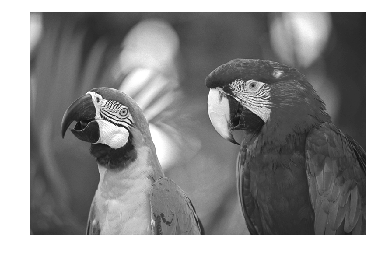

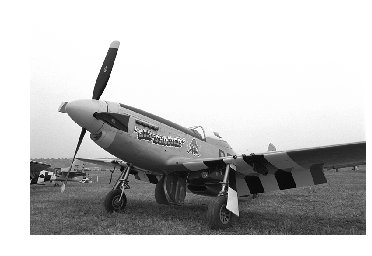

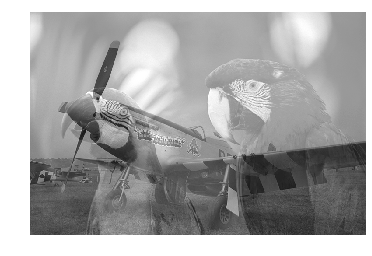

In [46]:
parrots = load_image_gray("imgs/parrots.png")
plane = load_image_gray("imgs/plane.png")
show_image(parrots)
show_image(plane)
show_image((plane+parrots)/2.0)

But to *composite* on image on top of another (e.g. to place an actor filmed in front of a green screen into a CGI background), we need to *selectively* mix to gether images. This is called alpha masking (this why the transparency option in some programs is called *alpha*).

There is a simple process: you take two images $X$ and $Y$, and a special third image $A$ called the **alpha mask** or sometimes the **matte**. $A$ is a grayscale image; where $A$ is white, $X$ shows through. Where $A$ is black, $Y$ shows through. Where $A=0.5$, $0.5X+0.5Y$ is mixed together.

The general formula for this masking is very simple $$Z = AX + (1-A)Y,$$ where $Z$ is the output image.

* An alpha mask is contained in the file `imgs/parrots_alpha.png`
* Load it (use `load_image_gray()`) and show it.
* Compute the alpha composited image (parrots on background) by implementing the equation above using Numpy arrays.  This is very simple and should not involve a loop!
* Show the composited image.

### Optional extension
Make this work in colour (use `load_image_colour()` to load a colour image; `show_image()` will still work to show it)


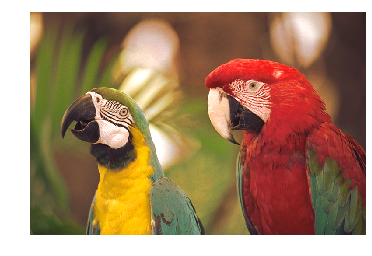

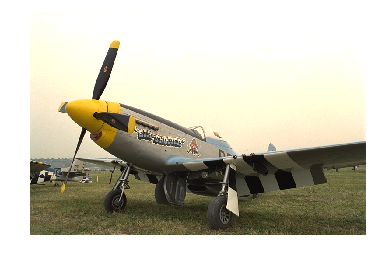

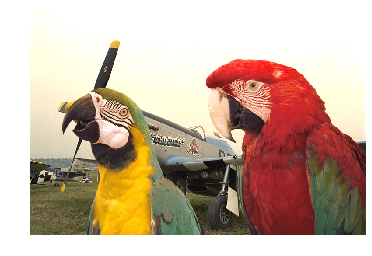

In [80]:
# Solution goes here
X = load_image_colour("imgs/parrots.png")
show_image(X)

Y = load_image_colour("imgs/plane.png")
show_image(Y)
A = load_image_colour("imgs/parrots_alpha.png")

Z = A*X + (1-A)*Y

show_image(Z)


## A.4 Data operations

The file `environmental.csv` contains air quality data for New York City on different days. There are 111 rows and 5 columns. The data is in the format:

    index,ozone,radiation,temperature,wind
    
The cell below loads this data.

* Print out the shape and dtype of the dataset.
* Plot the ozone level against the index. (remember that `plt.plot(x,y)` will plot an array of y-values against an array of x-values).
* Plot the ratio of the temperature to the wind against the index. *use `plt.figure()` to generate a new figure to plot in*
* Print the difference in temperature between the days with the highest and lowest ozone.
* Print the median wind speed.
* Use `plt.plot(x,y,'.')` to plot a disconnected graph of ozone (y) against wind speed (x).

In [81]:
atm_nyc = np.loadtxt("environmental.csv", delimiter=",")

(111L, 5L) float64
22.0
9.7


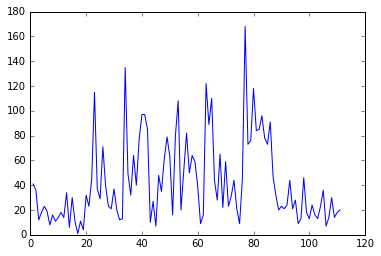

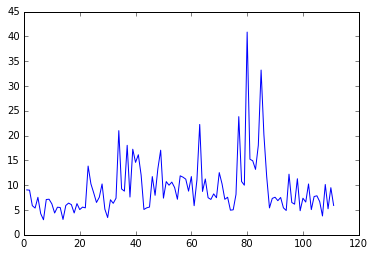

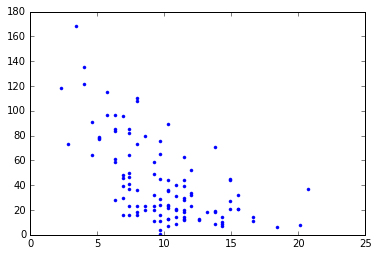

In [112]:
# Solution goes here
print atm_nyc.shape, atm_nyc.dtype

index = atm_nyc[:,0]
ozone = atm_nyc[:,1]
radiation = atm_nyc[:,2]
temperature = atm_nyc[:,3]
wind = atm_nyc[:,4]

plt.plot(index, ozone)

plt.figure()
plt.plot(index,(temperature/wind))

print atm_nyc[np.argmax(ozone),3] - atm_nyc[np.argmin(ozone),3]

print np.median(atm_nyc[:,4])

plt.figure()
plt.plot(wind,ozone, '.')

What effect does wind speed have on ozone levels, in general?

## A.5 Sunspots
Astronomers have counted the number of visible **sunpots** on the sun every day since 1749. The code below loads this data (averaged over one month intervals) as a Numpy array. It has three columns:

    index, year, mean sunspots

`year` is in the date in fractional years (e.g. 1800.5 means half way through 1800).

The index just increments from 1 upwards, and isn't interesting to us.

In [121]:
# load the data
sunspots = np.loadtxt("sunspots.csv", delimiter=",")    
print sunspots.shape, sunspots.dtype

(2820L, 3L) float64


We can plot the sunspot data directly with `plot`

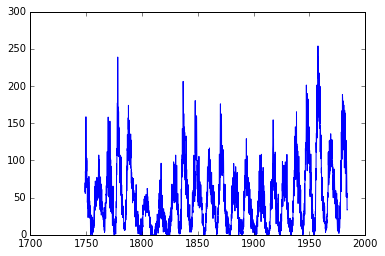

In [111]:
# plot second column (time in years) against third (number of sunspots)
plt.plot(sunspots[:,1], sunspots[:,2])

**Without using any loops**, answer the following questions:
1. What is the most number of sunspots seen?
1. What is the least number of sunspots seen?
1. Which year had the most sunspots?
1. What is the average (mean) number of sunspots?
1. **Using reshape()**, what is the average number of sunspots for March? *Hint: there are 12 months in the year!*
1. **Again using reshape()**, what is the ratio of the *average* standard deviation of the number of sunspots *within one year* to the standard deviation of all the sunspot data? In other words, how much variability is there typically within one year compared to the variability across all years?


In [203]:
# Solution goes here
sunspots = np.loadtxt("sunspots.csv", delimiter=",")  

index = sunspots[:,0]
year = sunspots[:,1]
sunspot = sunspots[:,2]

print "Answers"

print "1.", np.max(sunspot)
print "2.", np.min(sunspot)
print "3.", int(sunspots[np.argmax(sunspot),1])
print "4.", np.mean(sunspot)

sunspots = sunspots.reshape(235,12,3)
print "5.", np.mean(sunspots[:,2,2])

std_year = np.mean(np.std(sunspots[:,:,2], axis = 1 ))
std_total = np.std(sunspot)

print "6.", std_year/std_total

Answers
1. 253.8
2. 0.0
3. 1957
4. 51.2659574468
5. 50.0408510638
6. 0.30912480051


# B: A computer art exhibition
You have been hired to demonstrate the artistic and expressive aspects of computer science. You have to build an installation to be displayed in a museum to show off what can be done.

You have three exhibits to produce:
* Interactive display: the Game of Life
* Printwork: quilted gradients
* Printwork: firework particle explosion

## B.1 Game of Life
The Game of Life is a very famous **cellular automaton**. It is not a game in the traditional sense of the word, but a kind of simulation. It simulates the birth and death of a very simplified model of a "cell" according to very simple rules. It was invented by the mathematician John H. Conway in 1969

<img src="imgs/jhc.jpg">
*John H. Conway [Image Credit "Thane Plambeck" - "http://www.flickr.com/photos/thane/20366806/", CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=13076802]*

The Game of Life assumes that these "cells" are represented as a big 2D array (like a giant chessboard), where each element of the array can be 1 (on/alive) or 0 (off/dead). Rules are defined which, given a array of cells in one timestep, determine how the cells should evolve in the next timestep. 

The rules are very simple:

* For each cell in the array:
    * Check all eight neighbours in a 3x3 grid around the cell
    * If cell was already on, and there are exactly 2 neighbours, the cell stays on.
    * If there are exactly three neighbours, the cell becomes on, regardless of whether it was on or off before.
    * Otherwise, the cell becomes off.

The eight neighbours of a cell look like this:
<img src="imgs/moore.png" width="200px">

### The rule
#### Still Lifes
The Game of Life rule has very interesting properties. Some arrangements of cells ("patterns") are **stable** and never change, like 4 on cells in a 2x2 grid, surrounded by all off cells.

<img src="imgs/block.png">

These are called **still lifes**.

#### Oscillators
Other patterns continuously oscillate between two states, like 3 cells in a line:

<img src="imgs/blinker.gif">

Patterns like these are called **oscillators**

#### Spaceships
Remarkably, there are discrete equivalents of *waves* in this simulation; patterns which appear to move across empty space.

<img src="imgs/glider.gif">

These are called **spaceships** and are much, much rarer than any of the other patterns we have seen so far.

------

Despite the extremely simple rules, patterns in the Game of Life have an enormous diversity of behavior, with strange and intricate constructions like **puffer trains**, **rakes**, **breeders**, **Herschel tracks** and **guns**. It has been shown to be possible to create patterns which copy themselves (reproduce), although these are extremely complex.

It is even possible to implement a complete working computer as a pattern in the Game of Life -- a computer fabricated from cells which can compute anything a "real world" computer can (but extraordinarly slowly).

### Task
The Game of Life is very easy to represent as a big numerical array, each element of the array corresponding to a cell. Your task is to implement the Game of Life using arrays.
#### next_generation()
You need to write a function `next_generation(cells)`, which given an array `cells` consisting of 0s and 1s, returns a new array of 0s and 1s obeying the Game of Life rules. 

**You will need to use `for` loops to do this.**

You can use `show_image(cells)` to show the output array. Test your function on the  block and blinker examples before going further.

------
#### simulate()
Then, write a function `simulate(cells, n)` which will apply `next_generation` `n` times to the `cells`, and show an animation of the process by redrawing the image on each generation.


-----
### Hints
#### Animating
You can use `update_image(cells)` to update a drawing without creating a completely new image for each update; this lets you show an *animation* as `simulate()` runs. Note that you **must** call `show_image()` the first time you draw the image (to create a new blank figure canvas), and call `update_image()` to update the figure.


#### Correct simulation
**Note**: to get the simulation correct, you need create a new array and copy the values in. If you try and modify the cells in place, you will get completely incorrect behaviour (unless you are very clever with the array ops!).

#### Shape
Keep the shape of `cells` the same on each application of `next_generation()`. Note that you will have to do something at the edges of the array, where there aren't a full set of neighbour cells (e.g. what is top left of the the top left cell?). 

#### Wrapping at the edges
A common solution is just to assume that the array "wraps around" at the edges (e.g. that the leftmost element is next to the rightmost element). This is very easy to implement using the % operator, which allows you to force a value to lie within a certain range; see the example below to see why:

In [20]:
# forwards:
for i in range(12):
    print i, i % 5, " ",
print

# backwards
for i in range(0,-12,-1):
    print i, i % 5, " ",


### Test patterns
There are some test patterns provided for you. `load_pattern(name, padding)` returns a 2D array with the given pattern, with `padding` 0 (off) cells around it. You can check that this is just a standard Numpy array. 
The padding argument allows you to get an array with enough room for a pattern to "grow".

These patterns include:
* `block` the 2x2 pattern above, which should not change
* `blinker` the 3x1 pattern above, which should switch between vertical and horizontal
* `glider` the spaceship above, which should move up and to the right.

There are many more.

In [22]:
import lifeparsers

# load the block
block = lifeparsers.load_life("life/block.l")
show_image(block)

# load the blinker
blinker = lifeparsers.load_life("life/blinker.l")
show_image(blinker)

# load the glider (with some extra padding)
glider = lifeparsers.load_life("life/glider.l", padding=4)
show_image(glider)


In [23]:
# Solution goes here

##### Question: what does the pattern "gun.l" do?
If you've implemented `simulate()` correctly, the following will work:

In [24]:
gun = lifeparsers.load_life("life/gun.l", padding=20)
simulate(gun, 60)

In [25]:
mystery = np.rot90(lifeparsers.load_life("life/schick.l", padding=30))
simulate(mystery, 60)

## B.2 Gradient quilts
A **gradient** is an image where the colour varies smoothly from one side to the other.
<img src="imgs/gradient.png">

Your task is to create a colourful quilt of small gradient images which have been joined together.

## linspace and outer
We will use two new array functions to create a gradient. 
* `linspace` (linearly spaced) creates a 1D array of points much like `arange` does. But instead of increasing by one unit each time, we can specify a range and the number of steps to split that range up into.

`np.linspace(a,b,n_steps)` means: create `n_steps` elements, starting at `a` and stopping at `b`.  (note that linspace is **inclusive** of the argument `b`, unlike `arange`).

Run the examples below to get a feel for this. 


In [26]:
print np.linspace(0,1,5)  # 0->1 in 5 steps

In [27]:
print np.linspace(0,1,10)  # 0->1 in 10 steps

In [28]:
print np.linspace(0,100,6)  # 0->100 in 6 steps

`np.outer(row_array,col_array)` computes what mathematicians call the "outer product"; it takes two 1D arrays and creates a new 2D array where each element is formed of the product of the respective element of row_array and col_array. 

$$A = \text{outer}(\textbf{r},\textbf{c}),\ A_{ij} = r_i \times c_j$$

This sounds complicated, but is actually very simple to use. Let's see how we can use it to create gradients:

In [31]:
# from 0 -> 1, 200 steps
x = np.linspace(0,1,200)
# just 200 1s in a row
y = np.ones((200,))
# now we create a 200x200 matrix, which is the gradient we want to use
show_image(np.outer(x,y))

In [32]:
# rotate it, and make it darker
show_image(np.outer(y*0.5,x))

In [33]:
# curved gradient
show_image(np.outer(x,x))

In [34]:
# how does this work?
show_image(np.outer(x,(4 * x * x[::-1])))

## Colour
Just like in the alpha blending example, we can use this gradient as a **mask** to blend together two images. If the images are just solid colours, then we will get a colour gradient.

A solid colour image can be generated like this (among other ways). Try playing with this to see how it works. Note that the output is a 50x50x3 matrix: 50x50 pixels, each with an R G and B value. R G and B need to be between 0.0 and 1.0.

In [36]:
# 50x50x3 colour image
image = np.ones((50,50,3))
# set the RGB components for the whole image
image[:,:,0] = 0.12  # not much red (12%)
image[:,:,1] = 0.75  # plenty of green (75%)
image[:,:,2] = 0.3  # some blue (30%)
show_image(image)

In [38]:
# another way of doing exactly the same thing
#                         R     G     B       
image = np.tile(np.array([0.12, 0.75, 0.3]), (50,50,1))
show_image(image)

## Task
Write a function `gradient_block()`, which generates a pair of **random** solid colour images, each with shape (50,50,3). Generate a gradient like the ones above, and use it to blend the two colours together. Return the resulting array.

Note that there is a handy function to generate a bunch of random numbers in one go, which you might find useful:

In [39]:
# generate a 3 element array, with random numbers between -1 and 1
print np.random.uniform(-1,1,(3,))

`gradient_block()` should return an array that can be shown with `show_image()` that looks something like this:
    
    show_image(gradient_block())
    
<img src="imgs/gradient.png">    

In [41]:
# Solution goes here

## Task 2
Write a function `quilt(rows, cols)` that creates a number of these gradient blocks -- an array of them of size rows x cols, and joins them all together into a single array and returns it.

Make `quilt()` apply a random one of:
* rot90
* fliplr
* flipud

to each quilt element before joining it together.

The output for `quilt(3,4)` should look like this (obviously, colors may vary!)
<img src="imgs/quilt.png">

**Feel free to be creative and find nicer ways of generating quilts; you can generate triangular or circular gradients, choose better colours, possibly even have some irregularity in the size of quilt blocks (tricky!)**

In [47]:
# Solution goes here

## B.3 Firework particle system

We missed Guy Fawkes day, but we can simulate fireworks using a simple **particle system**. We will use very (*very*) basic physics to simulate how particles (in this case, little bits of fireworks) move around.

The output from your code for this part should look like this:
<img src="imgs/fireworks.png">

We'll simulate this using a set of simple equations that apply to a whole set of particles at the same time (i.e. vectorized operations).

## Particle system

Assume we can model a single firework explosion at a given time as a set of N points in 2D, i.e. an array of N rows of 2 columns (x and y).  

To simulate a firework exploding, we need to simulate the motion of these points "bursting out" from a central position and falling down.

Assume we also have some information about the initial velocity (dx and dy) of each particle (i.e. which way it went at the moment of detonation). 

We can predict where the particle is at time $t$ from where it was in the last time step $t-1$ using the equations:
$$\textbf{x}_{t} = \textbf{x}_{t_1} + \textbf{dx}_{t_1}$$
$$\textbf{dx}_{t} = \textbf{dx}_{t-1} * d$$
$$\textbf{dx}_{t}.y = \textbf{dx}_{t-1}.y - g$$

$d$ is a damping factor (from air resistance). $g$ is the gravitational force.

Note that x and dx are 2D vectors (i.e. they have $x$ and $y$ components), not just plain numbers!

## Random  numbers
We can use random numbers to give initial values for the velocities (after all, the particles all spread out in random ways when a firework goes off). The function `np.random.normal(mean, std, shape)` generates *normally distributed* values, centered on `mean` with a "spread" given by `std`, in an array of the given `shape`.

In [ ]:
# 4 element vector, centered on 0, spread of 0.1
print np.random.normal(loc=0, scale=0.1, size=(4,))

In [376]:
# 8 element vector, centered on 0, spread of 10
print np.random.normal(loc=0, scale=10, size=(8,))

In [58]:
# 6x6 matrix, centered on 0, spread of 2
print np.random.normal(loc=0, scale=2, size=(6,6))

## Task 1
Implement the equations of motion for a single firework.

* You should start with all points at the same *position* (e.g. all at (0,0)), but with random velocities, using `np.random.normal()`, as above. 
* Start with 50 particles in the firework. Remember, the positions of every particle should be in one single array!
* To implement the gravity, remember you can modify a slice of an array (e.g. a column slice).
* Run the equations for 30 steps, updating the position and velocity.
* Use `plot_array(pts)` defined below to plot the positions *on each timestep*
* To start, use `g=0.01`, `d=0.9`. Adjust these as you feel best.
* At the end, you should get a single, monochrome firework like this:
<img src="imgs/mono_firework.png">

In [121]:
def plot_array(pts, c=None):
    """Plot pts (must be a Nx2 array) as points. 
    If c is specified, it must be an Nx4 array of RGBA values, giving
    the colour for each point."""
    plt.gca().set_axis_bgcolor('black')
    if c is None:
        plt.scatter(pts[:,0], pts[:,1], c='r', edgecolor="none")
    else:
        plt.scatter(pts[:,0], pts[:,1], c=np.clip(c,0,1), edgecolor="none")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

# Example: plot 20 random 2D points
plot_array(np.random.normal(0,1,(20,2)))        

In [122]:
# Solution goes here

### Task 2
* Plot several fireworks, each with a different random starting position (*hint*: how can broadcasting help you here?)
* Start with 5 fireworks.
* plot_array() can take a second argument, `color`:
e.g. `plot_array(x, color)`
* The colours given to plot_array must be an Nx4 array (red, green, blue, alpha). The alpha should initially be set to 1, so that the fireworks don't start out transparent. RGB should be values between 0 and 1.
* Choose a random colour for each firework. Note that you need to give a colour for each *particle* in the firework. (*hint*: how can `tile()` help you?)
* Make the colours fade as the simulation runs (i.e. they should get darker or more transparent in future time steps). Think about how the damping changed the velocity.

In [123]:
# Solution goes here

# C: Extended problems
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. <font color="red"> You do not need to attempt any of this section to receive a tick! </font>

## C.1 Blurring images
A blurring effect can be obtained by summing together multiple shifted copies of an array representation of a image, scaled down by some factor. This is a process called "convolution". In this task, you will implement a very simple blur function (a "box" blur).

In [124]:
import skimage.transform
# just loads the orchid, and makes it a bit lower res, so 
# we can easily see any blurring
orchid = load_image_gray("imgs/orchid.png")
orchid_low_res = skimage.transform.rescale(orchid, 0.25)
show_image(orchid_low_res)

In [125]:
# think carefully about what this line does!
blurred = 0.5*orchid_low_res[1:, :]+0.5*(orchid_low_res[:-1, :])
show_image(blurred)

In [126]:
blurred = 0.5*blurred[1:, :]+0.5*(blurred[:-1, :])
show_image(blurred)

## Task
The task in this exercise is to write a function that can blur images using this approach. The code above just blurs in the y-direction (across rows). Extend it to blur in both x and y, and allow the number of "passes" (blur operations) to be specified for the x and y directions. 

Your function should look like:
    
    def blur(img, x_passes, y_passes):

-----

If you load the `orchid.png` image in colour with `load_image_colour` and blur it with

    blur(orchid, x_passes=25, y_passes=25)
    
you should get an image like this:
<img src="imgs/blur_orchid.png">

In [127]:
# Solution goes here

## C.2 Drum sounds
1D arrays can be used to represent sounds. In this task, you will implement a digital drum machine using only simple mathematical functions.
<img src="imgs/tr808.jpg">
*[Image credit: By Eriq at Dutch Wikipedia, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=38020306]*

A pure tone is a *sine wave*. A sine wave can be computed by taking the `sin()` of an increasing number (e.g. generated by linspace)

In [128]:
# Warning: loud bass!
# 10000 = 10000 samples = ~1/4 second of sound (44100 samples/second)
tone = np.sin(np.linspace(0,100,10000))
play_sound(tone)

Different volume can be achieved by scaling the tone, and different pitches by scaling the value *inside* the np.sin()

In [130]:
# multiply *outside* the sine (try changing the 0.2)
quiet_tone = np.sin(np.linspace(0,100,10000))*0.2
play_sound(quiet_tone)

In [131]:
# multiply *inside* the sine (try changing the 4)
high_tone = np.sin(np.linspace(0,100,10000)*4)
play_sound(high_tone) # loud!

## Task
Work out how to make a kick drum sound. My kick sounds like this:

<audio controls="controls">  <source src="imgs/kick.wav"  type="audio/wav">  </audio>

A kick drum decreases in pitch and volume over time. *An exponentially decaying function is particularly useful here.*

In [109]:
# an exponentially decaying function
# this can be used to vary volume over time
a = np.linspace(0,10,200)
plt.plot(a, np.exp(-a))

You can distort sounds using `np.tanh()`, as shown below. Use this to improve your drum sound.

In [110]:
tone = np.sin(np.linspace(0,100,10000))
# note we scale up the array *inside* the tanh() and then scale it down again
play_sound(np.tanh(tone*10)*0.5)

In [116]:
# Solution goes here

## Task 2
Now observe that random numbers sound like noise:

In [117]:
noise = np.random.uniform(-1,1,10000)*0.2
play_sound(noise)

Implement a hihat drum sound. Create a long and a short hihat.

<audio controls="controls">  <source src="imgs/hat.wav" type="audio/wav">  </audio>

<audio controls="controls">  <source src="imgs/long_hat.wav" type="audio/wav">  </audio>


In [118]:
# Solution goes here

In [119]:
# Solution goes here

Finally, assemble your sounds into a beat by concatenating together your drum sounds. You will need to pad your sounds with zeros such that they are all the same length if you don't want the timing to be horrible!
<audio controls="controls">  <source src="imgs/beat.wav" type="audio/wav">  </audio>


In [136]:
# Solution goes here

## C.3 Boids
Fair warning: this is a hard problem. It is acheivable, but only attempt it if you are both enthusaistic and very comfortable with the array operations we have seen so far.

Extend the fireworks code to implement the *boids* animation algorithm explained at http://www.vergenet.net/~conrad/boids/pseudocode.html
(a high level explanation can be read at https://cs.stanford.edu/people/eroberts/courses/soco/projects/2008-09/modeling-natural-systems/boids.html)

This models the "flocking" behaviour of birds. It is widely used in computer animation. For example, the motion of the famous wildebeest stampede scene in the Lion King was computed with a modified Boids algorithm.

Represents your boids as a single Numpy array. Use columns to represent x,y,dx,dy, and any other per-boid values you need.

Use the `plot_array` from the fireworks example to plot your results. I recommend calling `plt.clf()` before each `plot_array()`  to clear the drawing each time (otherwise you will run into slowdowns, and you'll have a big trail behind all of your Boids).

Start with a simple 2D model of the Boids. You can implement a 3D model as well, but you will need to be able to project it onto 2D to draw it!


In [ ]:
~